In [1]:
!pip install transformers[sentencepiece] -q 

     |████████████████████████████████| 4.7 MB 4.7 MB/s 
     |████████████████████████████████| 6.6 MB 57.1 MB/s 
     |████████████████████████████████| 120 kB 72.5 MB/s 
     |████████████████████████████████| 1.3 MB 65.5 MB/s 


In [2]:
!pip install datasets -q

     |████████████████████████████████| 365 kB 4.9 MB/s 
     |████████████████████████████████| 115 kB 65.1 MB/s 
     |████████████████████████████████| 212 kB 55.7 MB/s 
     |████████████████████████████████| 127 kB 66.3 MB/s 


In [3]:
from datasets import load_dataset

In [4]:
from datasets import list_datasets
huggingface_datasets = list_datasets()
print(huggingface_datasets)

['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews', 'allocine', 'alt', 'amazon_polarity', 'amazon_reviews_multi', 'amazon_us_reviews', 'ambig_qa', 'americas_nli', 'ami', 'amttl', 'anli', 'app_reviews', 'aqua_rat', 'aquamuse', 'ar_cov19', 'ar_res_reviews', 'ar_sarcasm', 'arabic_billion_words', 'arabic_pos_dialect', 'arabic_speech_corpus', 'arcd', 'arsentd_lev', 'art', 'arxiv_dataset', 'ascent_kb', 'aslg_pc12', 'asnq', 'asset', 'assin', 'assin2', 'atomic', 'autshumato', 'babi_qa', 'banking77', 'bbaw_egyptian', 'bbc_hindi_nli', 'bc2gm_corpus', 'beans', 'best2009', 'bianet', 'bible_para', 'big_patent', 'billsum', 'bing_coronavirus_query_set', 'biomrc', 'biosses', 'blbooks', 'blbooksgenre', 'blended_skill_talk', 'blimp', 'blog_authorship_corpus', 'bn_hate_speech', 'bnl_newspapers', 'bookcorpus', 'bookcorpusopen', 'boolq', 'bprec', 'break_data', 'brwac', 'bsd_ja_en', 'bswac'

#Load Data

In [5]:
imdb = load_dataset("imdb")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
imdb["test"]

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [7]:
imdb["test"][0]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

In [8]:
print(imdb)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [9]:
import pandas as pd
imdb.set_format(type='pandas')
df = imdb['train'][:]
df.tail()

,text,label
24995,A hit at the time but now better categorised a...,1
24996,I love this movie like no other. Another time ...,1
24997,This film and it's sequel Barry Mckenzie holds...,1
24998,'The Adventures Of Barry McKenzie' started lif...,1
24999,The story centers around Barry McKenzie who mu...,1


In [10]:
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [11]:
df.shape

(25000, 2)

#Preprocess

In [12]:
def label_int2str(row):
    return imdb['train'].features['label'].int2str(row)
df['label_representation'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_representation
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,neg
1,"""I Am Curious: Yellow"" is a risible and preten...",0,neg
2,If only to avoid making this type of film in t...,0,neg
3,This film was probably inspired by Godard's Ma...,0,neg
4,"Oh, brother...after hearing about this ridicul...",0,neg


In [13]:
df.label_representation.unique()

array(['neg', 'pos'], dtype=object)

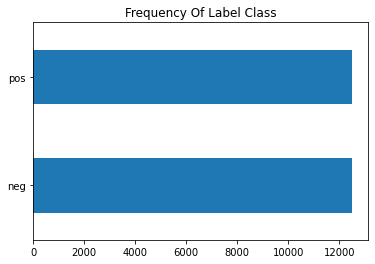

In [14]:
import matplotlib.pyplot as plt
df['label_representation'].value_counts(ascending=True).plot.barh()
plt.title('Frequency Of Label Class')
plt.show()

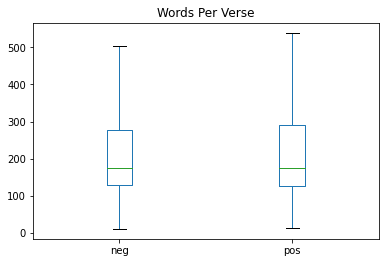

In [15]:
df['Words Per Verse'] = df['text'].str.split().apply(len)
df.boxplot('Words Per Verse', by='label_representation', grid=False, showfliers=False)
plt.suptitle('')
plt.xlabel('')
plt.show()

In [16]:
imdb.reset_format()
print(imdb)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [17]:
from transformers import AutoTokenizer
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [18]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)
print(tokenize(imdb['train'][:2]))
print(len(tokenize(imdb['train'][:2])))
# imdb['train'][:2]

{'input_ids': [[101, 1045, 12524, 1045, 2572, 8025, 1011, 3756, 2013, 2026, 2678, 3573, 2138, 1997, 2035, 1996, 6704, 2008, 5129, 2009, 2043, 2009, 2001, 2034, 2207, 1999, 3476, 1012, 1045, 2036, 2657, 2008, 2012, 2034, 2009, 2001, 8243, 2011, 1057, 1012, 1055, 1012, 8205, 2065, 2009, 2412, 2699, 2000, 4607, 2023, 2406, 1010, 3568, 2108, 1037, 5470, 1997, 3152, 2641, 1000, 6801, 1000, 1045, 2428, 2018, 2000, 2156, 2023, 2005, 2870, 1012, 1026, 7987, 1013, 1028, 1026, 7987, 1013, 1028, 1996, 5436, 2003, 8857, 2105, 1037, 2402, 4467, 3689, 3076, 2315, 14229, 2040, 4122, 2000, 4553, 2673, 2016, 2064, 2055, 2166, 1012, 1999, 3327, 2016, 4122, 2000, 3579, 2014, 3086, 2015, 2000, 2437, 2070, 4066, 1997, 4516, 2006, 2054, 1996, 2779, 25430, 14728, 2245, 2055, 3056, 2576, 3314, 2107, 2004, 1996, 5148, 2162, 1998, 2679, 3314, 1999, 1996, 2142, 2163, 1012, 1999, 2090, 4851, 8801, 1998, 6623, 7939, 4697, 3619, 1997, 8947, 2055, 2037, 10740, 2006, 4331, 1010, 2016, 2038, 3348, 2007, 2014, 3689, 38

In [19]:
dataset_encoded = imdb.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [43]:
dataset_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50000
    })
})

#Model 1: Text Classifier Via Hidden States & Feature Extraction

In [ ]:
import torch 
from transformers import AutoModel
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [ ]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return{'hidden_state':last_hidden_state[:,0].cpu().numpy()}
    
dataset_encoded.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
dataset_hidden_states = dataset_encoded.map(extract_hidden_states, batched=True)

In [45]:
import torch 
from transformers import AutoModel
device = torch.device('cpu')
# torch.device('cuda' if torch.cuda.is_available() else 'cpu') Alternative if GPU does not have enough allocated memory
model = AutoModel.from_pretrained(model_ckpt).to(device)

Feature MAtrix

In [ ]:
import numpy as np
# Where hidden states will be the inputs and labels are the targets
X_train = np.array(dataset_hidden_states['train']['hidden_state'])
X_valid = np.array(dataset_hidden_states['validation']['hidden_state'])
y_train = np.array(dataset_hidden_states['train']['label'])
y_valid = np.array(dataset_hidden_states['validation']['label'])
X_train.shape, X_valid.shape  

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train,y_train)
round(lr_clf.score(X_valid,y_valid),3)

#Text Classification Using Pretrained Model-Transformers

Pytorch

In [23]:
import torch
from transformers import AutoModelForSequenceClassification
num_labels = 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifi

In [25]:
from sklearn.metrics import accuracy_score, f1_score
def perf_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1 score': f1}

In [24]:
from transformers import Trainer, TrainingArguments
batch_size = 10 
logging_steps = len(dataset_encoded['train']) // batch_size
model_name = 'Custom Text Classifier'
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2, 
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy='epoch',
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level='error')

In [27]:
trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=perf_metrics,
                  train_dataset=dataset_encoded['train'],
                  eval_dataset=dataset_encoded['test'],
                  tokenizer=tokenizer)
trainer.train();

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1 score
1,0.280300,0.196629,0.928720,0.928706
2,0.157100,0.267592,0.932160,0.932159


In [28]:
preds_output = trainer.predict(dataset_encoded['test'])
preds_output.metrics

{'test_loss': 0.2675918936729431,
 'test_accuracy': 0.93216,
 'test_f1 score': 0.9321593053112863,
 'test_runtime': 400.7443,
 'test_samples_per_second': 62.384,
 'test_steps_per_second': 6.238}

In [33]:
import numpy as np
y_valid = np.array(dataset_encoded['test']['label'])
print(y_valid)

[0 0 0 ... 1 1 1]


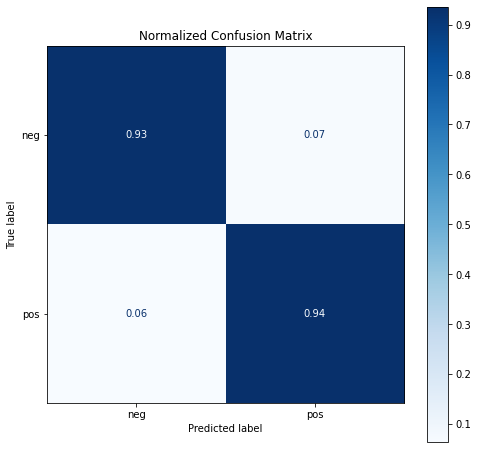

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig,ax = plt.subplots(figsize=(8,8))
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    display.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=True)
    plt.title('Normalized Confusion Matrix')
    plt.show()
labels = dataset_encoded['train'].features['label'].names
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, y_valid, labels)

#Tensorflow 

#Preprocess

In [42]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True,padding=False)
tokenized_imdb = imdb.map(preprocess_function, batched=True)

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

In [ ]:
#  tokenized_imdb = imdb.map(preprocess_function, batched=True)

In [40]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenized_imdb, return_tensors="tf")
data_collator

DataCollatorWithPadding(tokenizer=DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50000
    })
}), padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='tf')

In [ ]:
tf_train_set = dataset_encoded["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "label"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_validation_set = dataset_encoded["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "label"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

In [ ]:
from transformers import create_optimizer
import tensorflow as tf

batch_size = 16
num_epochs = 5
batches_per_epoch = len(tokenized_imdb["train"]) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
import tensorflow as tf

model.compile(optimizer=optimizer)

In [ ]:
model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=3)